# **TP ML And DL - Classification des leads en clients probable**

> **Nom:** BOPE SAIDI MEDARD ARNAULD
> **Promotion:** Master Complémentaire - ISTAT Kolwezi

## I. Context

L’industrie des technologies de l’information et de la communication appliquées à l’éducation (EdTech) a connu une croissance remarquable au cours de la dernière décennie. Bien que les prévisions annonçaient une valorisation du marché de l’enseignement en ligne à 286,62 milliards de dollars en 2023, cette estimation a probablement été dépassée compte tenu de l’accélération rapide du secteur. Avec un taux de croissance annuel composé (TCAC) de 10,26 % entre 2018 et 2023, l’éducation en ligne s’est imposée comme une alternative de plus en plus prisée face à l’enseignement traditionnel.

La pandémie de Covid-19 a également joué un rôle catalyseur en accélérant l’adoption massive des solutions d’apprentissage en ligne. Cette dynamique a non seulement accru la demande, mais aussi attiré de nombreux nouveaux acteurs sur le marché. Grâce à la démocratisation des outils de marketing numérique, les entreprises EdTech peuvent aujourd’hui toucher un public beaucoup plus large et générer de nombreux prospects, appelés « leads ».

Parmi les principales sources de génération de leads figurent :

* L’interaction du client avec des campagnes marketing sur les réseaux sociaux ou d’autres plateformes en ligne ;
* La navigation sur le site web ou l’application, notamment le téléchargement de brochures ;
* Les demandes d’information par e-mail.

Une fois ces prospects identifiés, les entreprises mettent en place un processus de conversion. Les représentants commerciaux contactent alors les leads par téléphone ou par courriel afin de mieux comprendre leurs besoins et de les convertir en clients payants.

### Objectifs

l'objectif de ce travail est d’identificatifier des prospects ayant la plus forte probabilité de conversion en clients payants, afin d’optimiser l’allocation des ressources commerciales.
La mission consiste à exploiter les données disponibles sur les leads pour atteindre les objectifs suivants :

* Construire un modèle d’apprentissage automatique capable de prédire la probabilité de conversion des prospects ;
* Identifier les variables clés influençant le processus de conversion ;
* Élaborer un profil type des leads les plus susceptibles de devenir clients, afin d’orienter les actions marketing et commerciales de manière plus ciblée.


### Description de données

Les données contiennent les différents attributs des prospects et les détails de leur interaction avec ExtraaLearn. Le dictionnaire de données détaillé est donné ci-dessous.


**Dictionnaire de données**
* ID: Identifiant du prospect
* age: Age du prospect
* current_occupation: Profession actuelle du chef de file. Les valeurs comprennent « Professionnel », “Chômeur” et « Étudiant ».
* first_interaction: Comment le lead a-t-il interagi pour la première fois avec ExtraaLearn. Les valeurs incluent « Site web », « Application mobile ».
* profile_completed: Quel pourcentage du profil a été rempli par le prospect sur le site web/l'application mobile. Les valeurs comprennent Faible - (0-50%), Moyen - (50-75%), Élevé (75-100%).
* website_visits: Combien de fois un client potentiel a-t-il visité le site web ?
* time_spent_on_website: Temps total passé sur le site web
* page_views_per_visit: Nombre moyen de pages du site web consultées au cours des visites.
* last_activity: Dernière interaction entre le responsable et ExtraaLearn.
    * Email Activity: Demande de détails sur le programme par courrier électronique, le représentant a partagé des informations avec un client potentiel, comme une brochure du programme, etc.
    * Phone Activity: Conversation téléphonique avec un représentant, conversation par SMS avec un représentant, etc.
    * Website Activity: Interaction sur le chat en direct avec un représentant, mise à jour du profil sur le site web, etc.

* print_media_type1: Drapeau indiquant si le lead a vu la publicité d'ExtraaLearn dans le journal.
* print_media_type2: Drapeau indiquant si le lead a vu la publicité d'ExtraaLearn dans le magazine.
* digital_media: Drapeau indiquant si le lead a vu la publicité d'ExtraaLearn sur les plateformes numériques.
* educational_channels: Drapeau indiquant si le lead a entendu parler d'ExtraaLearn dans les canaux éducatifs tels que les forums en ligne, les fils de discussion, les sites Web éducatifs, etc.
* referral: Indicateur indiquant si le responsable a entendu parler d'ExtraaLearn par le biais d'une référence.
* status: Drapeau indiquant si le lead a été converti en client payant ou non.

## **II. Importation des bibliothèques nécessaires**

In [1]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Bibliothèques pour aider à la lecture et à la manipulation des données

import pandas as pd
import numpy as np


# Bibliothèque pour diviser les données
from sklearn.model_selection import train_test_split

# librairies pour aider à la visualisation des données
import matplotlib.pyplot as plt
import seaborn as sns

# Supprime la limite du nombre de colonnes affichées
pd.set_option("display.max_columns", None)

# Définit la limite du nombre de lignes affichées
pd.set_option("display.max_rows", 200)

# fixer la précision des nombres flottants à 5 points décimaux
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Construire un modèle de prédiction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Pour accorder différents modèles
from sklearn.model_selection import GridSearchCV

# Pour les modeles de reseaux de neurons
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Pour obtenir des scores métriques différents
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
    mean_squared_error, 
    r2_score
)

## III. Importation d'un jeu de données - Dataset

In [2]:
learn = pd.read_csv("Data/ExtraaLearn.csv") 

In [3]:
# Copier des données dans une autre variable afin d'éviter toute modification des données d'origine
data = learn.copy()

### Afficher les 5 premières et 5 dernières lignes de l'ensemble de données

In [4]:
data.head() 

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [5]:
data.tail(5)

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


## **IV. Analyse exploratoire des données - EDA**

### Comprendre la dimension de l'ensemble de données

In [6]:
data.shape

(4612, 15)

### Vérifier les types de données des colonnes de l'ensemble de données

In [7]:
data.dtypes

ID                        object
age                        int64
current_occupation        object
first_interaction         object
profile_completed         object
website_visits             int64
time_spent_on_website      int64
page_views_per_visit     float64
last_activity             object
print_media_type1         object
print_media_type2         object
digital_media             object
educational_channels      object
referral                  object
status                     int64
dtype: object

In [8]:
# vérification des valeurs en double
data.duplicated().sum()

np.int64(0)

**Vérifions le résumé statistique des données.**

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.00000,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
website_visits,4612.00000,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400
status,4612.00000,0.29857,0.45768,0.00000,0.00000,0.00000,1.00000,1.00000


In [10]:
# Établir une liste de toutes les variables catégorielles
cat_col = list(data.select_dtypes("object").columns)

for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

ID
EXT4612    1
EXT001     1
EXT002     1
EXT003     1
EXT4596    1
          ..
EXT009     1
EXT008     1
EXT007     1
EXT006     1
EXT005     1
Name: count, Length: 4612, dtype: int64
--------------------------------------------------
current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
--------------------------------------------------
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
--------------------------------------------------
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
--------------------------------------------------
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64
--------------------------------------------------
print_media_type1
No     4115
Yes     497
Name: count, dtype: int64
--------------------------------------------------
print_media_type2
No     4379
Yes     233
Name

In [11]:
# vérification du nombre de valeurs uniques
data["ID"].nunique()

4612

In [12]:
data.drop(["ID"], axis = 1, inplace = True)

### Analyse univariable

In [13]:
# pour tracer un diagramme en boîte et un histogramme à la même échelle.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  
        sharex=True,  
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    ) 
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    ) 
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    ) 

### Observations sur l'age

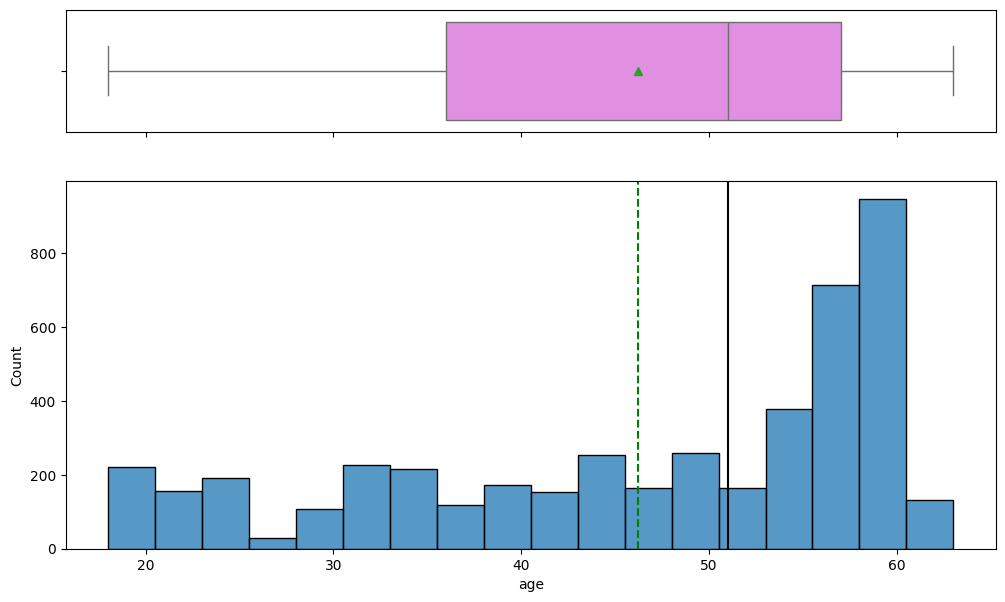

In [14]:
histogram_boxplot(data, "age") 

### Observations sur website_visits

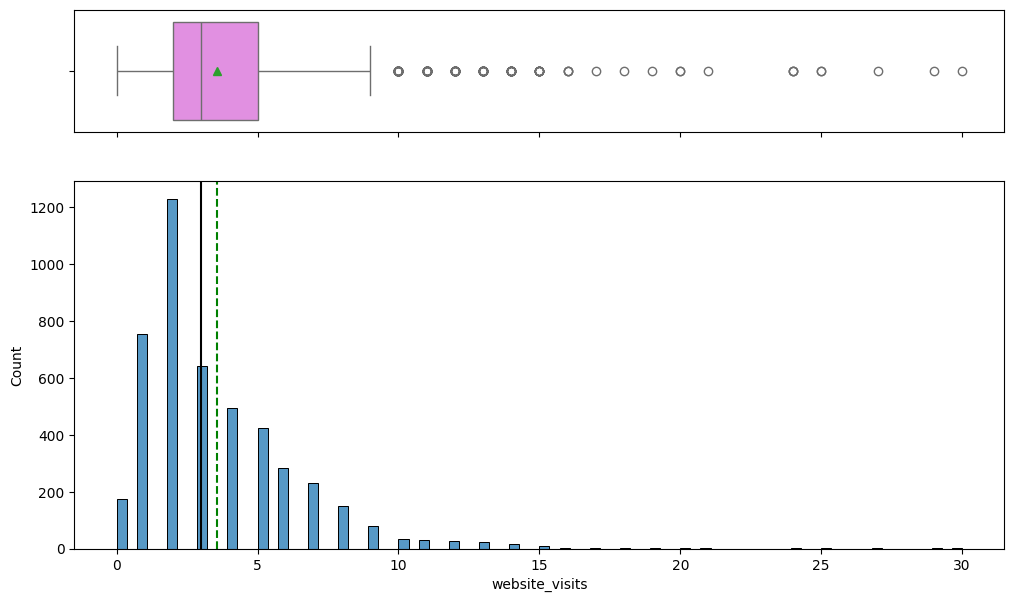

In [15]:
histogram_boxplot(data,"website_visits")

In [16]:
# Vérifier combien de prospects n'ont pas visité le site web
data[data["website_visits"] == 0].shape

(174, 14)

### Observations sur la colonne time_spent_on_website

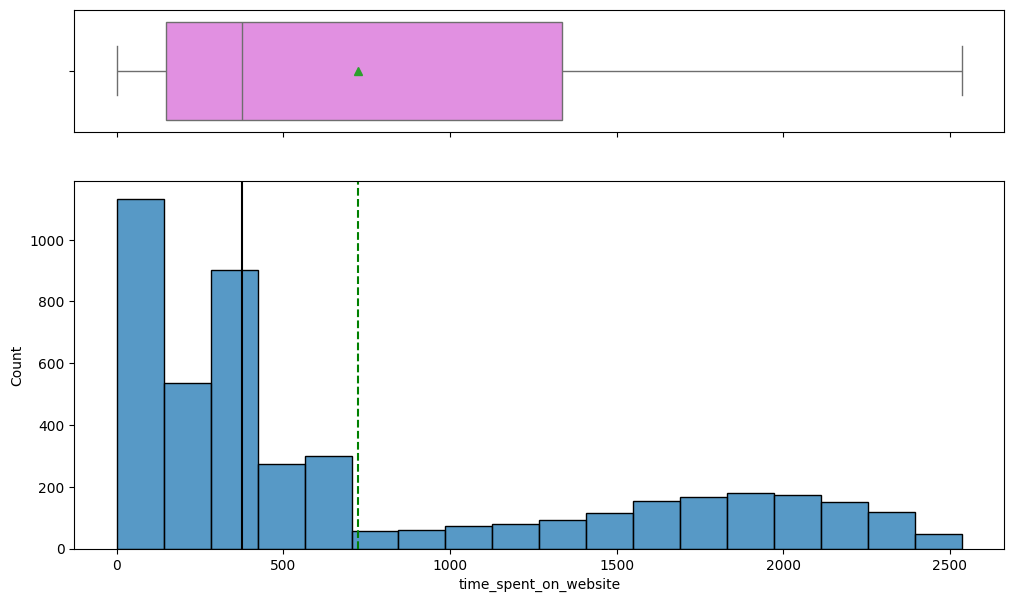

In [17]:
histogram_boxplot(data,"time_spent_on_website") 

### Observations sur le nombre de pages visitées page_views_per_visit

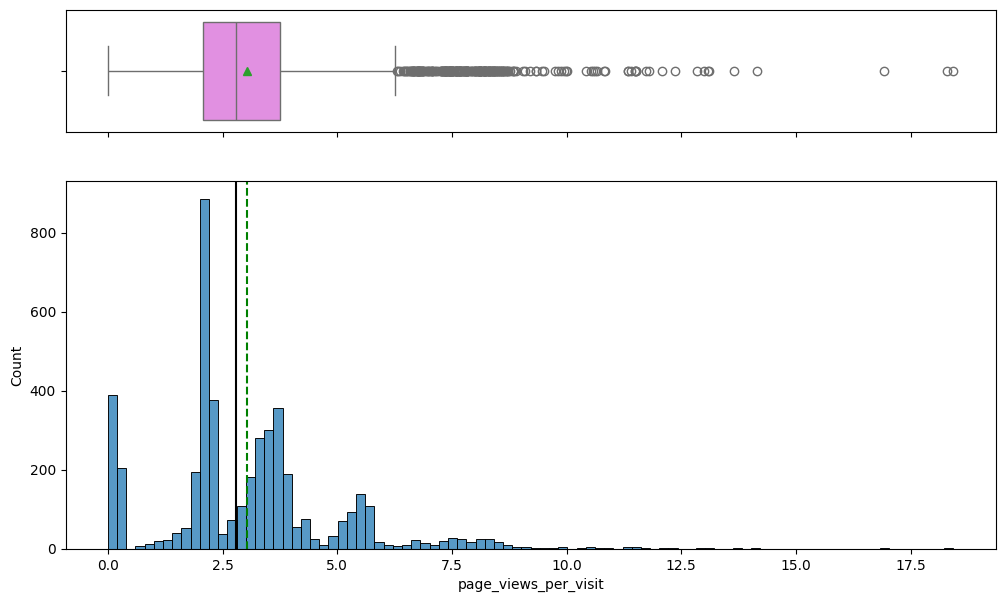

In [18]:
histogram_boxplot(data,"page_views_per_visit")

In [19]:
# pour créer des diagrammes à barres étiquetés


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations sur la colonne current_occupation

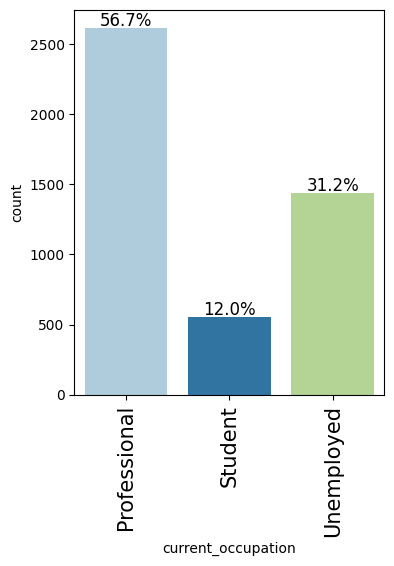

In [20]:
labeled_barplot(data, "current_occupation", perc=True)

### Observations la colonne first_interaction

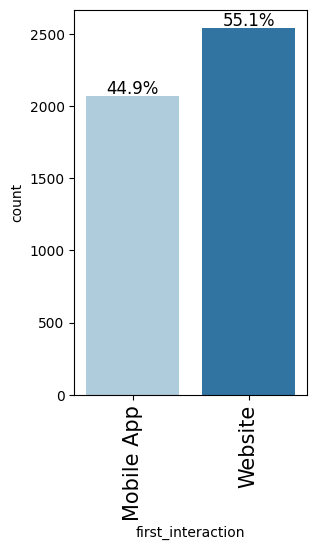

In [21]:
labeled_barplot(data, "first_interaction", perc=True)

### Observations sur la colonne profile_completed

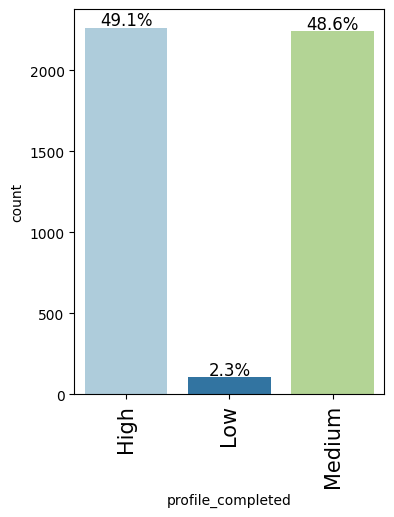

In [22]:
labeled_barplot(data, "profile_completed", perc=True) 

### Observations sur la colonne last_activity

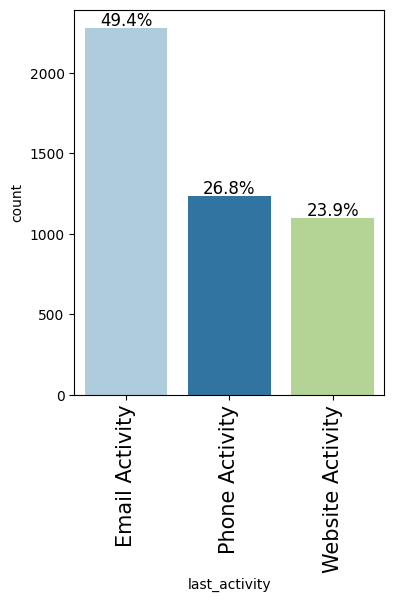

In [23]:
labeled_barplot(data, "last_activity", perc=True)

### Observations sur print_media_type1

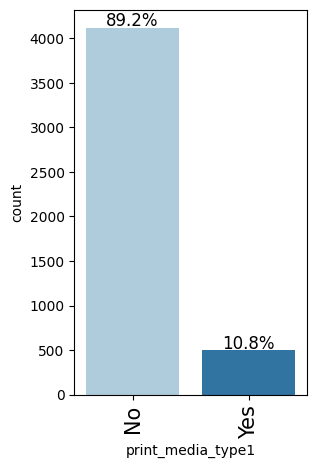

In [24]:
labeled_barplot(data, "print_media_type1", perc=True)

### Observations sur la colonne print_media_type2

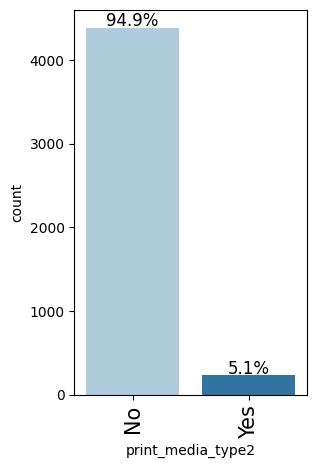

In [25]:
labeled_barplot(data, "print_media_type2", perc=True)

### Observations sur la colonne digital_media

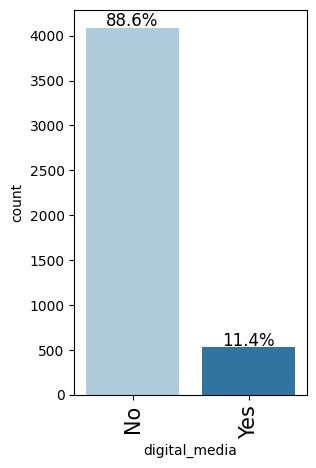

In [26]:
labeled_barplot(data, "digital_media", perc=True)

### Observations sur la colonne educational_channels

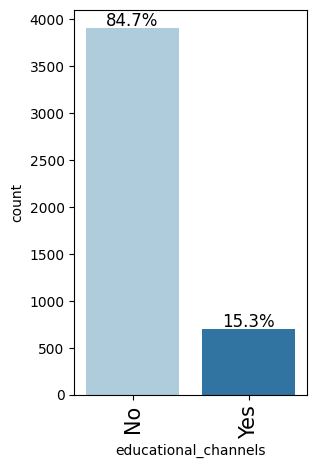

In [27]:
labeled_barplot(data, "educational_channels", perc=True)

### Observations sur la colonne referral

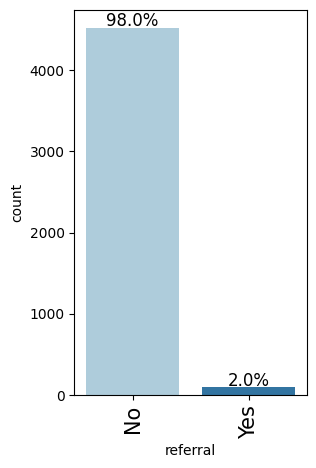

In [28]:
labeled_barplot(data, "referral", perc=True)

### Observations sur la colonne status qui est notre cible

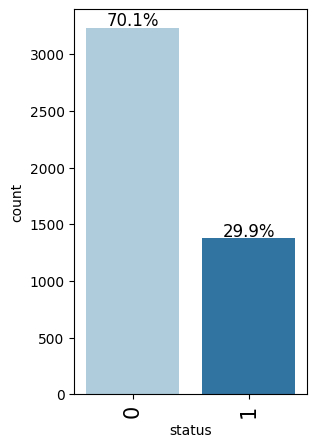

In [29]:
labeled_barplot(data, "status", perc=True)

**Observations :**
* On observe que seulement 30 % des prospects se convertissent en clients, tandis que les 70 % restants ne présentent pas un réel potentiel de conversion.
* C’est pourquoi il est essentiel de développer un modèle de machine learning, afin de permettre à l’équipe commerciale de se concentrer uniquement sur les leads les plus prometteurs.

### Analyse à deux variables

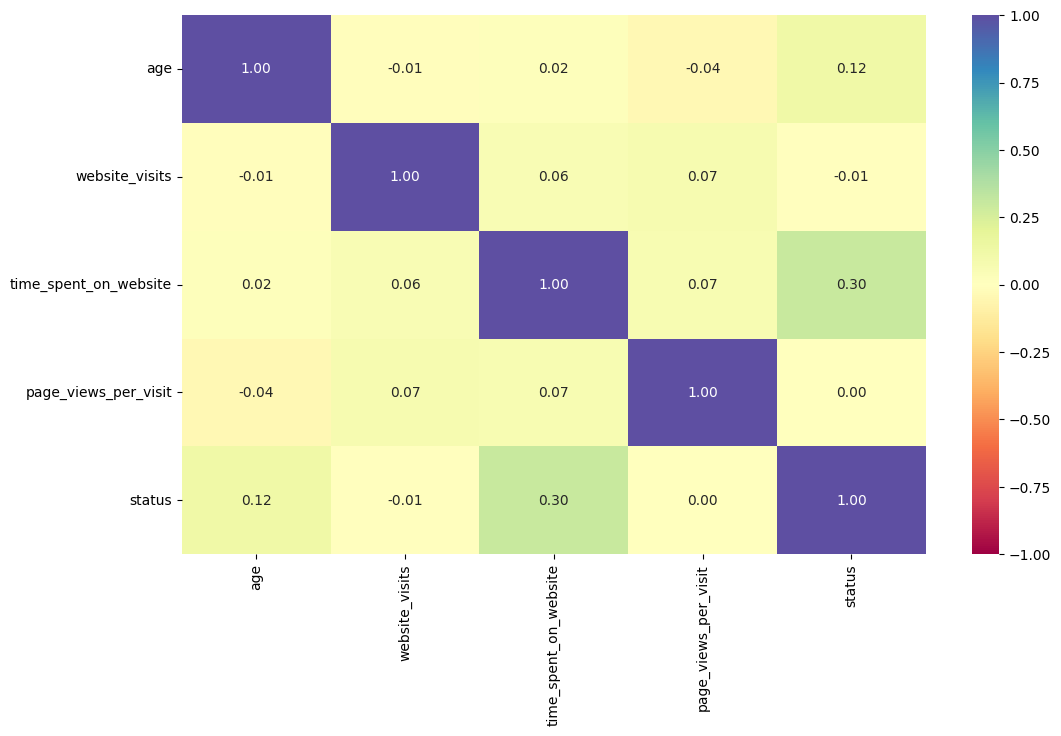

In [30]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Créer des fonctions qui nous aideront à effectuer des analyses plus approfondies.**

In [31]:
### fonction permettant de tracer des distributions par rapport à la cible


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution de la cible pour la cible=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution de la cible pour la cible=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [32]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Les prospects auront des attentes différentes quant aux résultats de la formation et la profession actuelle peut jouer un rôle clé dans leur décision de suivre le programme. Analysons-le**

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


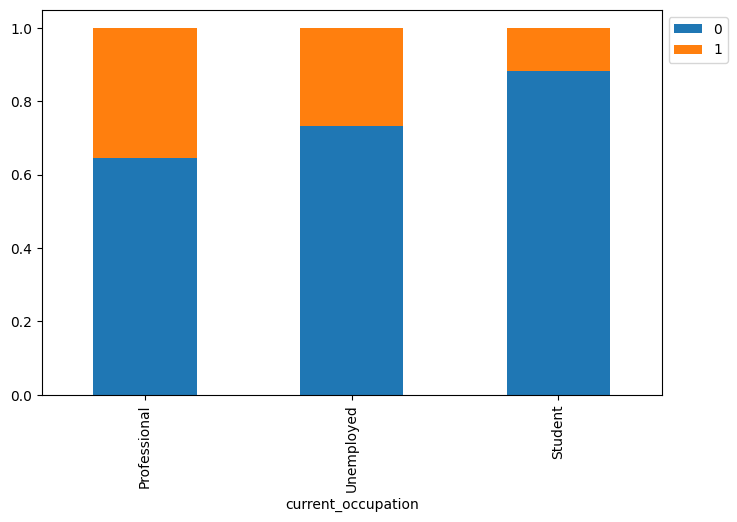

In [33]:
stacked_barplot(data, "current_occupation", "status")

**L'âge peut être un bon facteur pour différencier ces propects**

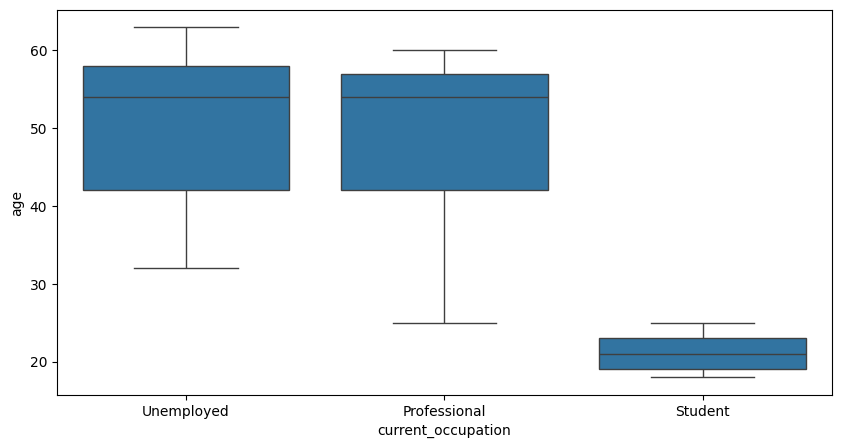

In [34]:
plt.figure(figsize=(10, 5))
sns.boxplot(data = data, x = data["current_occupation"], y = data["age"])
plt.show()

In [35]:
data.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.00000,49.34748,9.89074,25.00000,42.00000,54.00000,57.00000,60.00000
Student,555.00000,21.14414,2.00111,18.00000,19.00000,21.00000,23.00000,25.00000
Unemployed,1441.00000,50.14018,9.99950,32.00000,42.00000,54.00000,58.00000,63.00000


**la première interaction de l'entreprise avec les prospects doit être convaincante et persuasive. Voyons si les canaux de la première interaction ont un impact sur la conversion des prospects.**

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


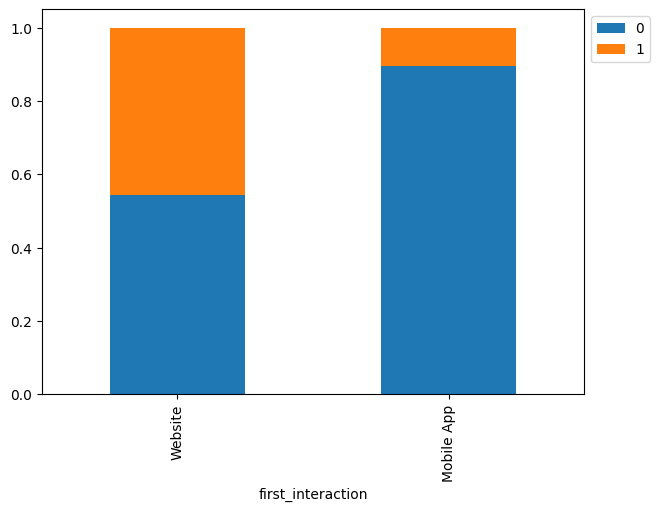

In [36]:
stacked_barplot(data,"first_interaction","status") # Complete the code to plot stacked_barplot for first_interaction and status

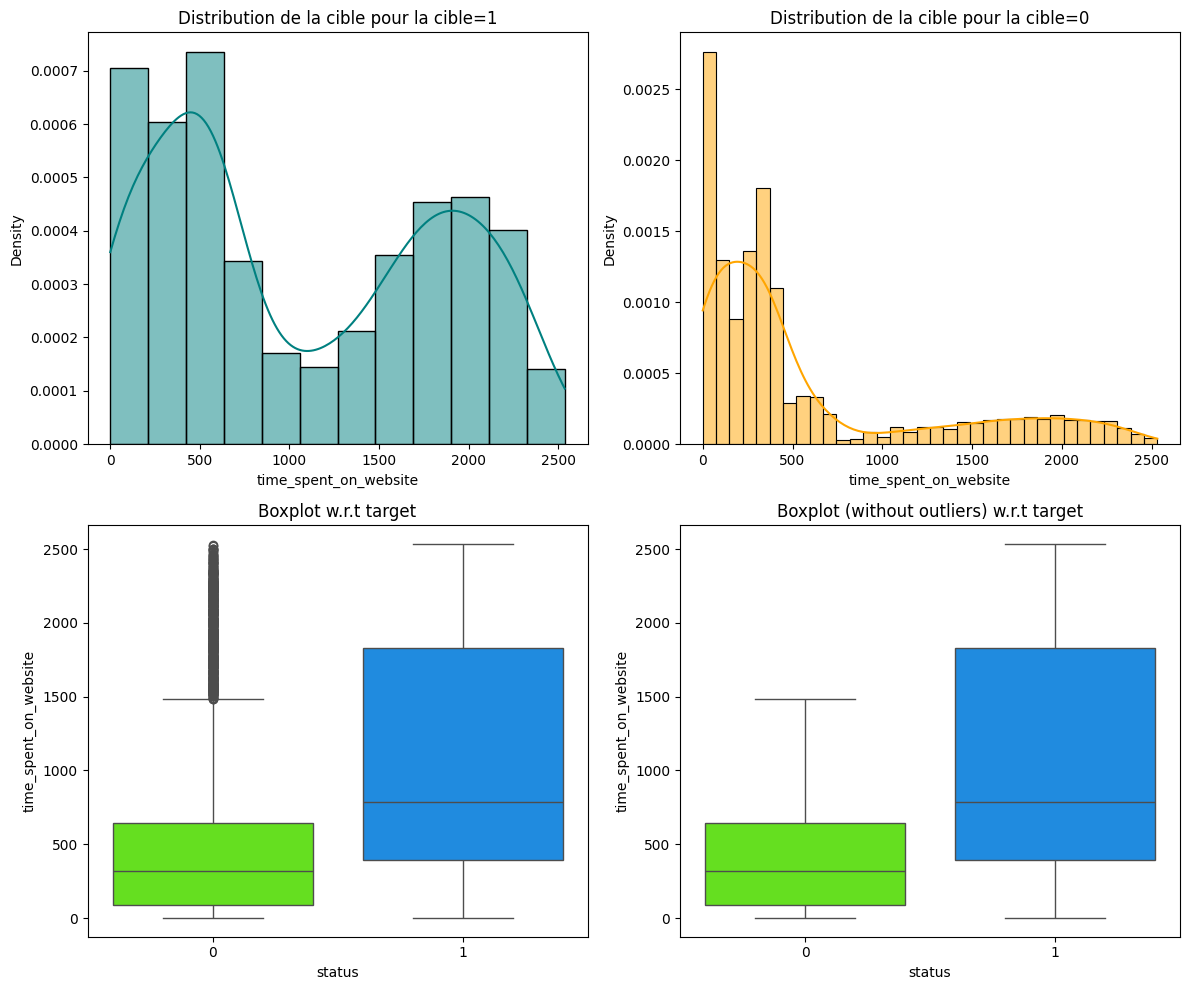

In [37]:
distribution_plot_wrt_target(data, "time_spent_on_website", "status")

In [38]:
# vérification de la valeur médiane
data.groupby(["status"])["time_spent_on_website"].median()

status
0   317.00000
1   789.00000
Name: time_spent_on_website, dtype: float64

**Effectuons une analyse similaire pour le temps passé sur le site web et les pages vues par visite.**

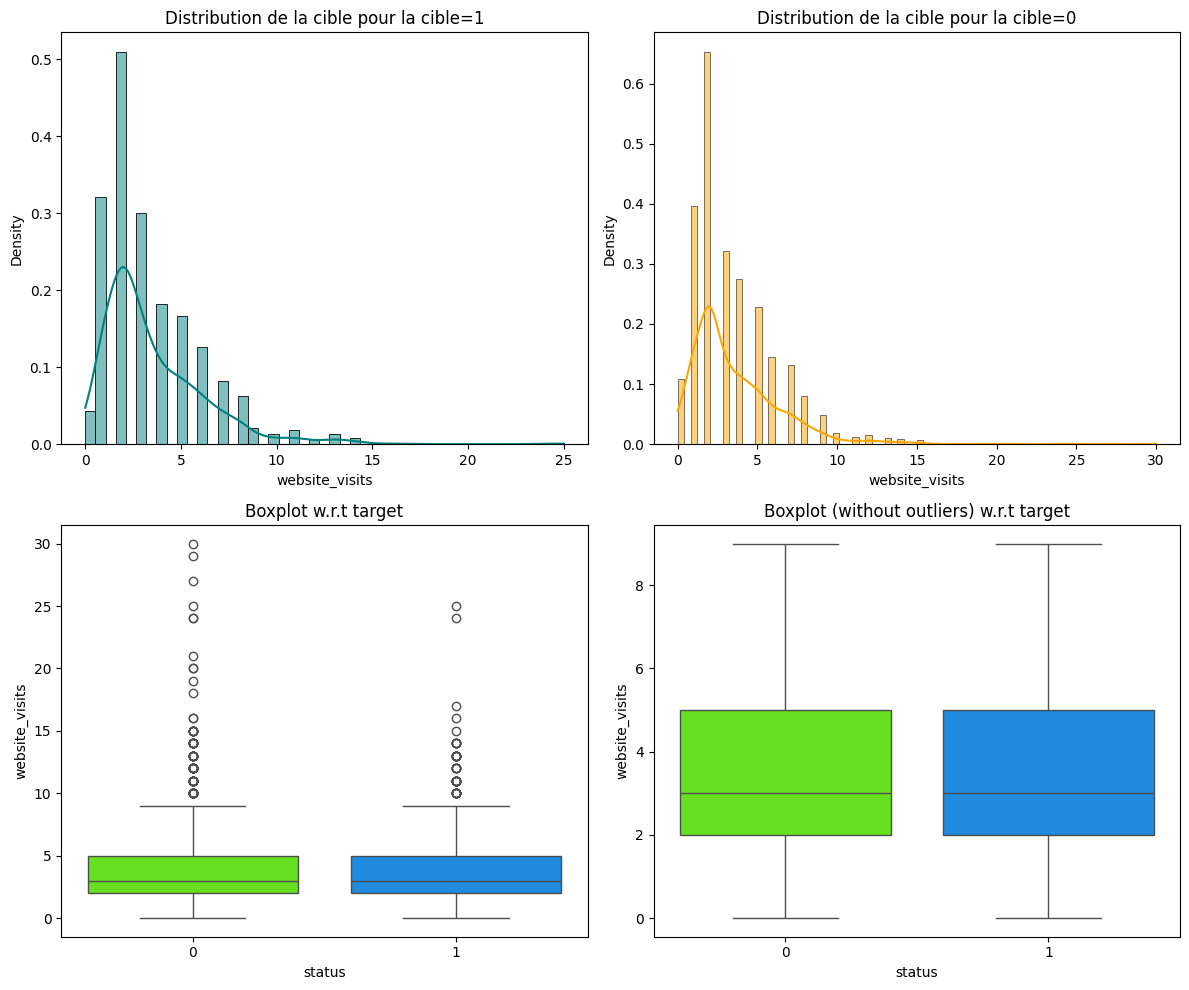

In [39]:
distribution_plot_wrt_target(data,"website_visits","status")

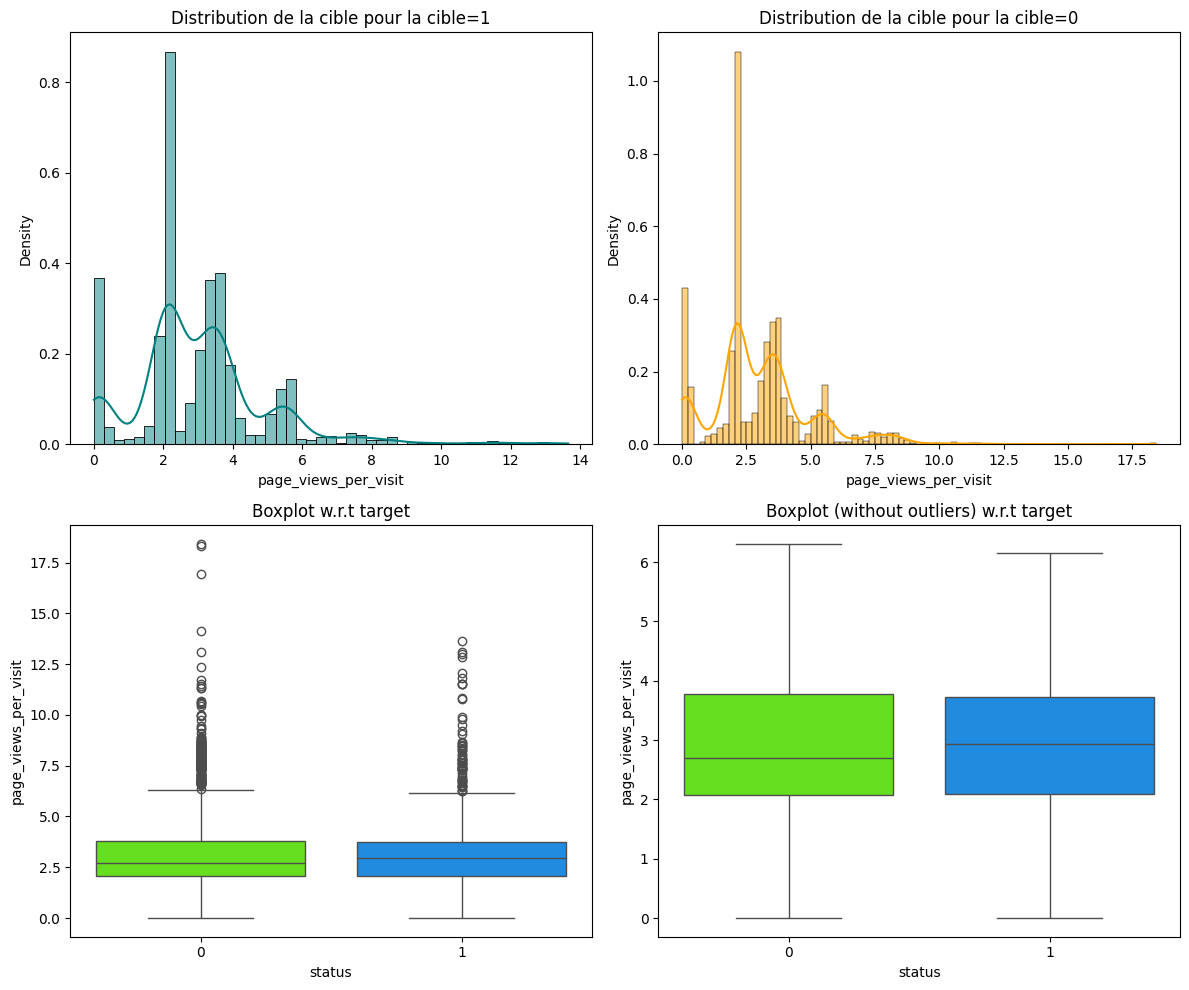

In [40]:
distribution_plot_wrt_target(data,"page_views_per_visit","status") 

**Les personnes qui naviguent sur le site web ou l'application mobile doivent généralement créer un profil en communiquant leurs données personnelles avant de pouvoir accéder à d'autres informations. Voyons si le niveau d'achèvement du profil a un impact sur le statut du lead**

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


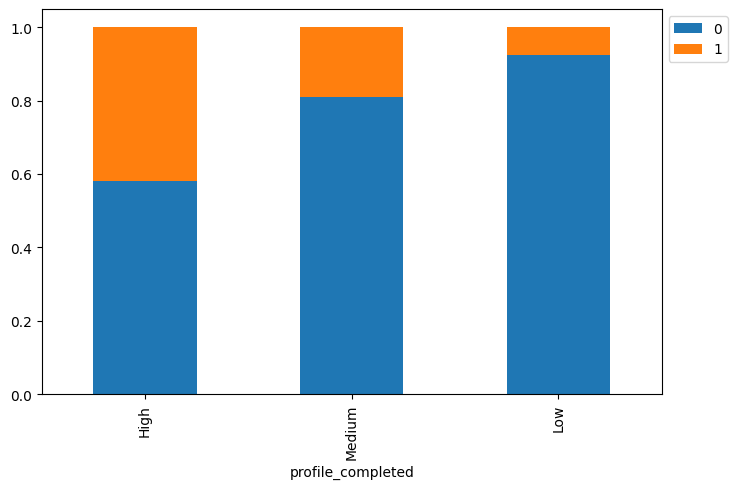

In [41]:
stacked_barplot(data,"profile_completed","status")  # Complete the code to plot stacked_barplot for profile_completed and status

**Après qu'un prospect a partagé ses informations en créant un profil, il peut y avoir des interactions entre le prospect et l'entreprise pour poursuivre le processus d'inscription. Voyons comment la dernière activité influe sur le statut de conversion des prospects**

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


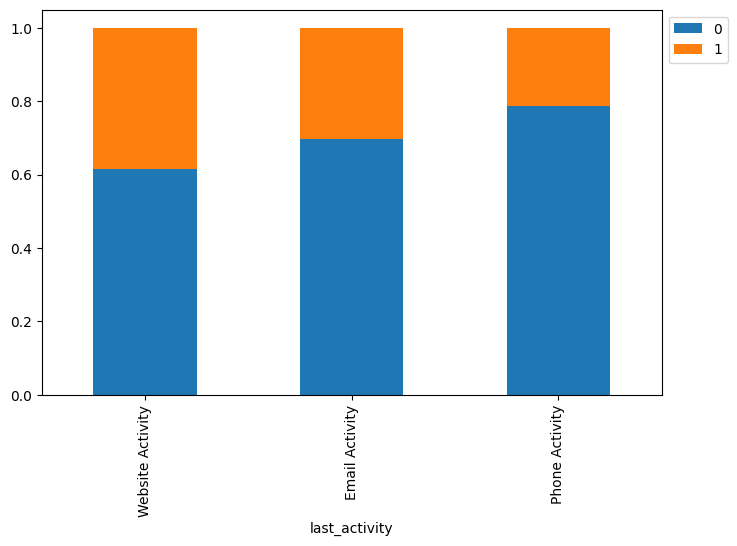

In [42]:
stacked_barplot(data,"last_activity","status") 

**Voyons comment la publicité et les recommandations influencent le statut des prospects.**

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


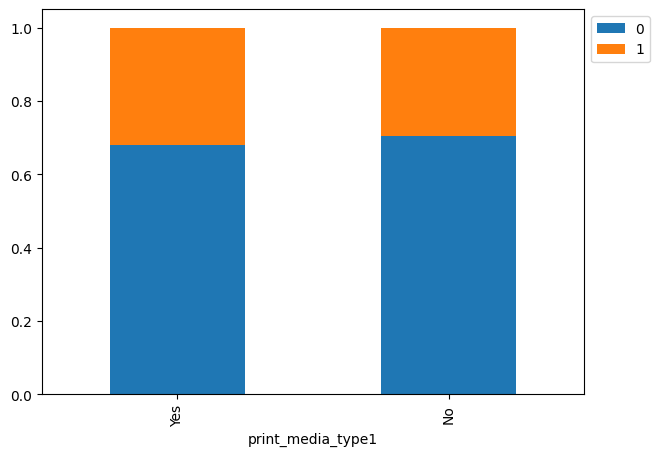

In [43]:
stacked_barplot(data,"print_media_type1","status") 

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


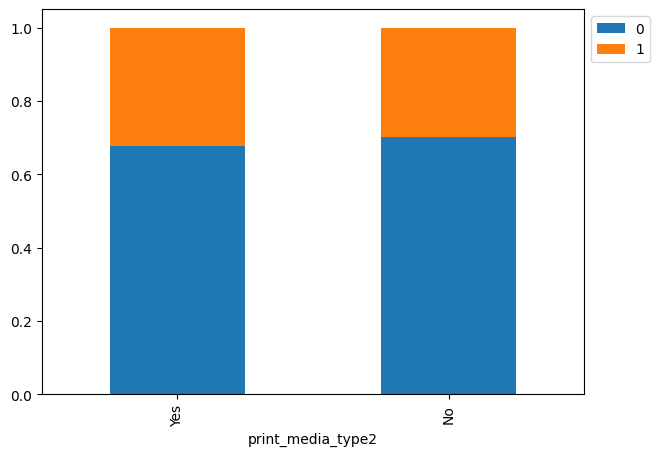

In [44]:
stacked_barplot(data,"print_media_type2","status")

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


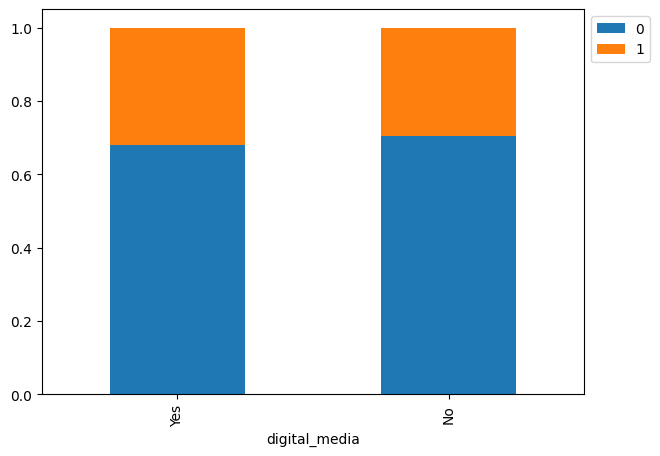

In [45]:
stacked_barplot(data,"digital_media","status") # Complete the code to plot stacked_barplot for digital_media and status

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


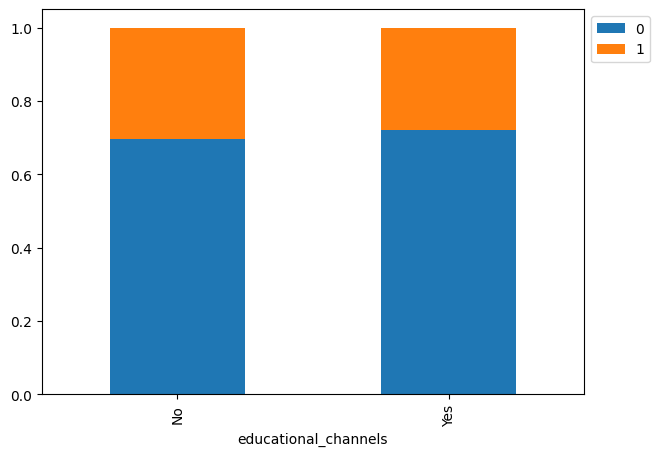

In [46]:
stacked_barplot(data,"educational_channels","status") 

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------


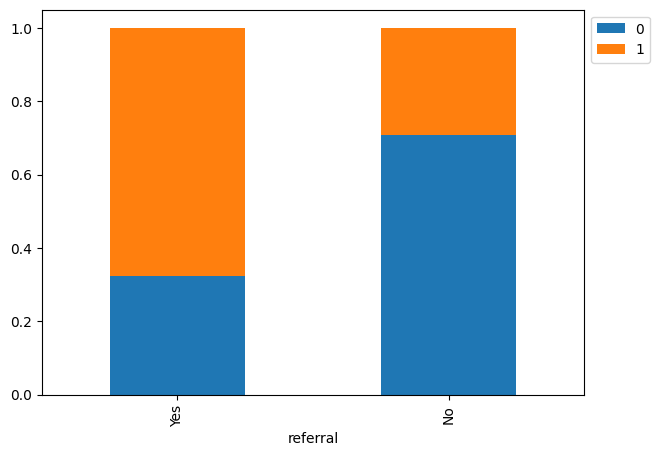

In [47]:
stacked_barplot(data,"referral","status") 

### Contrôle des valeurs aberrantes

- Vérifions si les données sont aberrantes.

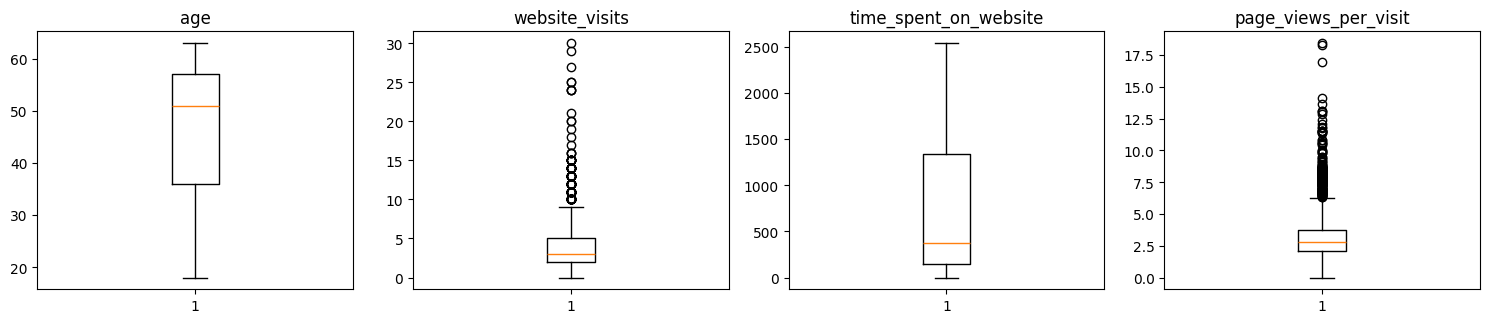

In [48]:
# détection des valeurs aberrantes à l'aide d'un diagramme en boîte
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# suppression de release_year car il s'agit d'une variable temporelle
numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:**
* Les colonnes **website_visits** et **page_views_per_sivit** presentent des valeures Aberrantes
* Nous allons uniformiser ces valeurs dans la suite lors de la construction du reseau de Neuron

### Préparation des données pour la modélisation

- Nous voulons prédire quelle piste a le plus de chances d'être convertie.
- Avant de procéder à la construction d'un modèle, nous devons coder les caractéristiques catégorielles.
- Nous diviserons les données en données d'entrainement et en données de test afin de pouvoir évaluer le modèle que nous construisons sur les données de formation.

In [49]:
X = data.drop(["status"], axis=1)
Y = data["status"]  

X = pd.get_dummies(X, drop_first=True) 

# Répartition des données dans un rapport 70:30 entre les données d'entrainement et les données de test
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [50]:
print("Dimension de données d'entrainement : ", X_train.shape)
print("Dimension de données de test: ", X_test.shape)
print("Pourcentage de classes dans l'ensemble de donéés d'entrainement:")
print(y_train.value_counts(normalize=True))
print("Pourcentage de classes dans l'ensemble de donéés de Test:")
print(y_test.value_counts(normalize=True))

Dimension de données d'entrainement :  (3228, 16)
Dimension de données de test:  (1384, 16)
Pourcentage de classes dans l'ensemble de donéés d'entrainement:
status
0   0.70415
1   0.29585
Name: proportion, dtype: float64
Pourcentage de classes dans l'ensemble de donéés de Test:
status
0   0.69509
1   0.30491
Name: proportion, dtype: float64


## **V. Construction des modèles de Machine Learning**

## **Création de modèles de classification**

#### Tout d'abord, créons des fonctions pour calculer les différentes mesures et la matrice de confusion afin de ne pas avoir à utiliser le même code à plusieurs reprises pour chaque modèle.
* La fonction model_performance_classification_statsmodels sera utilisée pour vérifier la performance des modèles. 
* La fonction confusion_matrix_statsmodels sera utilisée pour tracer la matrice de confusion.

In [51]:
# Fonction permettant d'imprimer le rapport de classification et d'obtenir la matrice de confusion dans un format approprié

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Non converti', 'Converti'], yticklabels = ['Non converti', 'Converti'])
    
    plt.ylabel('Réel')
    
    plt.xlabel('Prévu')
    
    plt.show()

## Decision Tree

### Construction d'un modèle d'arbre de décision

In [52]:
d_tree = DecisionTreeClassifier(random_state=1)

d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Vérification de la performance du modèle sur l'ensemble d'apprentissage

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



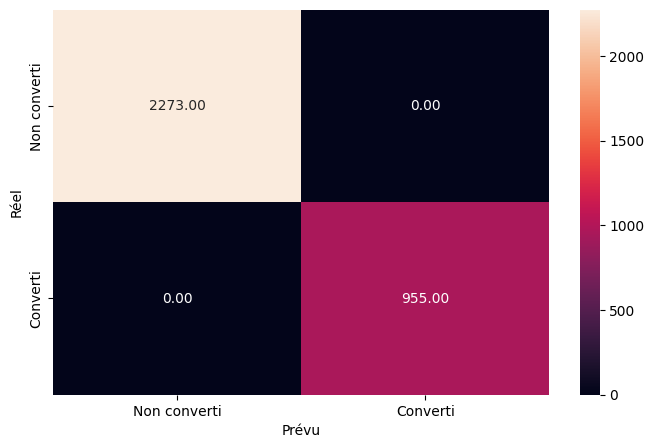

In [53]:
y_pred_train1 = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train1)


**Vérifions les performances sur les données de test pour voir si le modèle est surajusté.**

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       962
           1       0.69      0.70      0.70       422

    accuracy                           0.81      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.81      0.81      0.81      1384



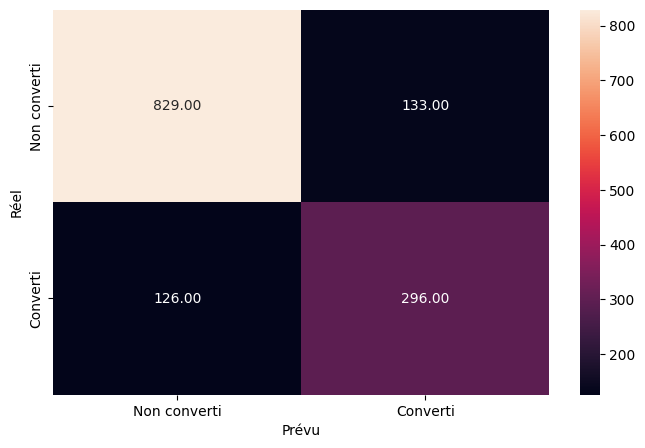

In [54]:
#Vérification des performances sur les données de test
y_pred_test1 = d_tree.predict(X_test)
metrics_score(y_test, y_pred_test1)

**Essayons d'ajuster les hyperparamètres à l'aide de GridSearchCV pour trouver la profondeur maximale optimale (max_depth**) afin de réduire l'ajustement excessif du modèle. Nous pouvons également régler d'autres hyperparamètres.

### **Decision Tree - Ajustement des hyperparamètres**
Nous utiliserons l'hyperparamètre class_weight avec une valeur égale à {0 : 0.3, 1 : 0.7} qui est approximativement l'opposé du déséquilibre dans les données originales.
**Cela indiquerait au modèle que la classe 1 est la plus importante ici.**

In [55]:
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

scorer = metrics.make_scorer(recall_score, pos_label = 1)

grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

d_tree_tuned = grid_obj.best_estimator_

d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=np.int64(3), min_samples_leaf=5,
                       random_state=7)

Nous avons ajusté le modèle et ajusté le modèle ajusté sur les données d'apprentissage. Maintenant, **vérifions les performances du modèle sur les données d'entraînement et de test**.

#### Vérification de la performance du modèle sur les ensembles de formation et de test

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



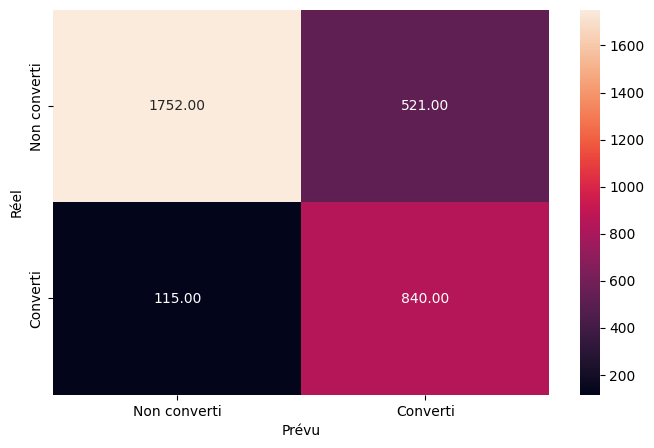

In [56]:
y_pred_train2 = d_tree_tuned.predict(X_train)
metrics_score(y_train, y_pred_train2)

**Vérifions la performance du modèle sur les données de test**

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



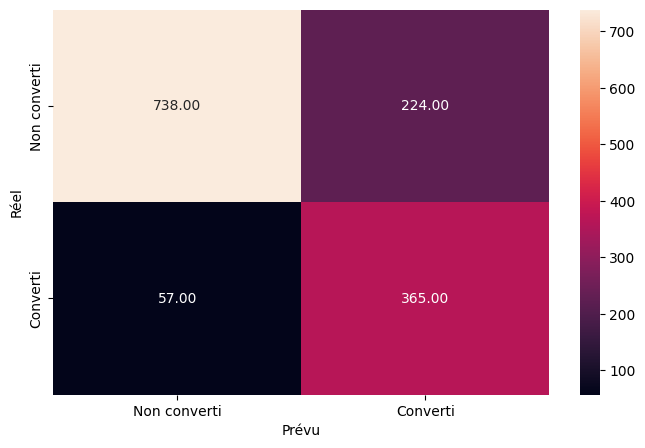

In [57]:
y_pred_test2 = d_tree_tuned.predict(X_test)
metrics_score(y_test, y_pred_test2)

### Visualisation de l'arbre de décision

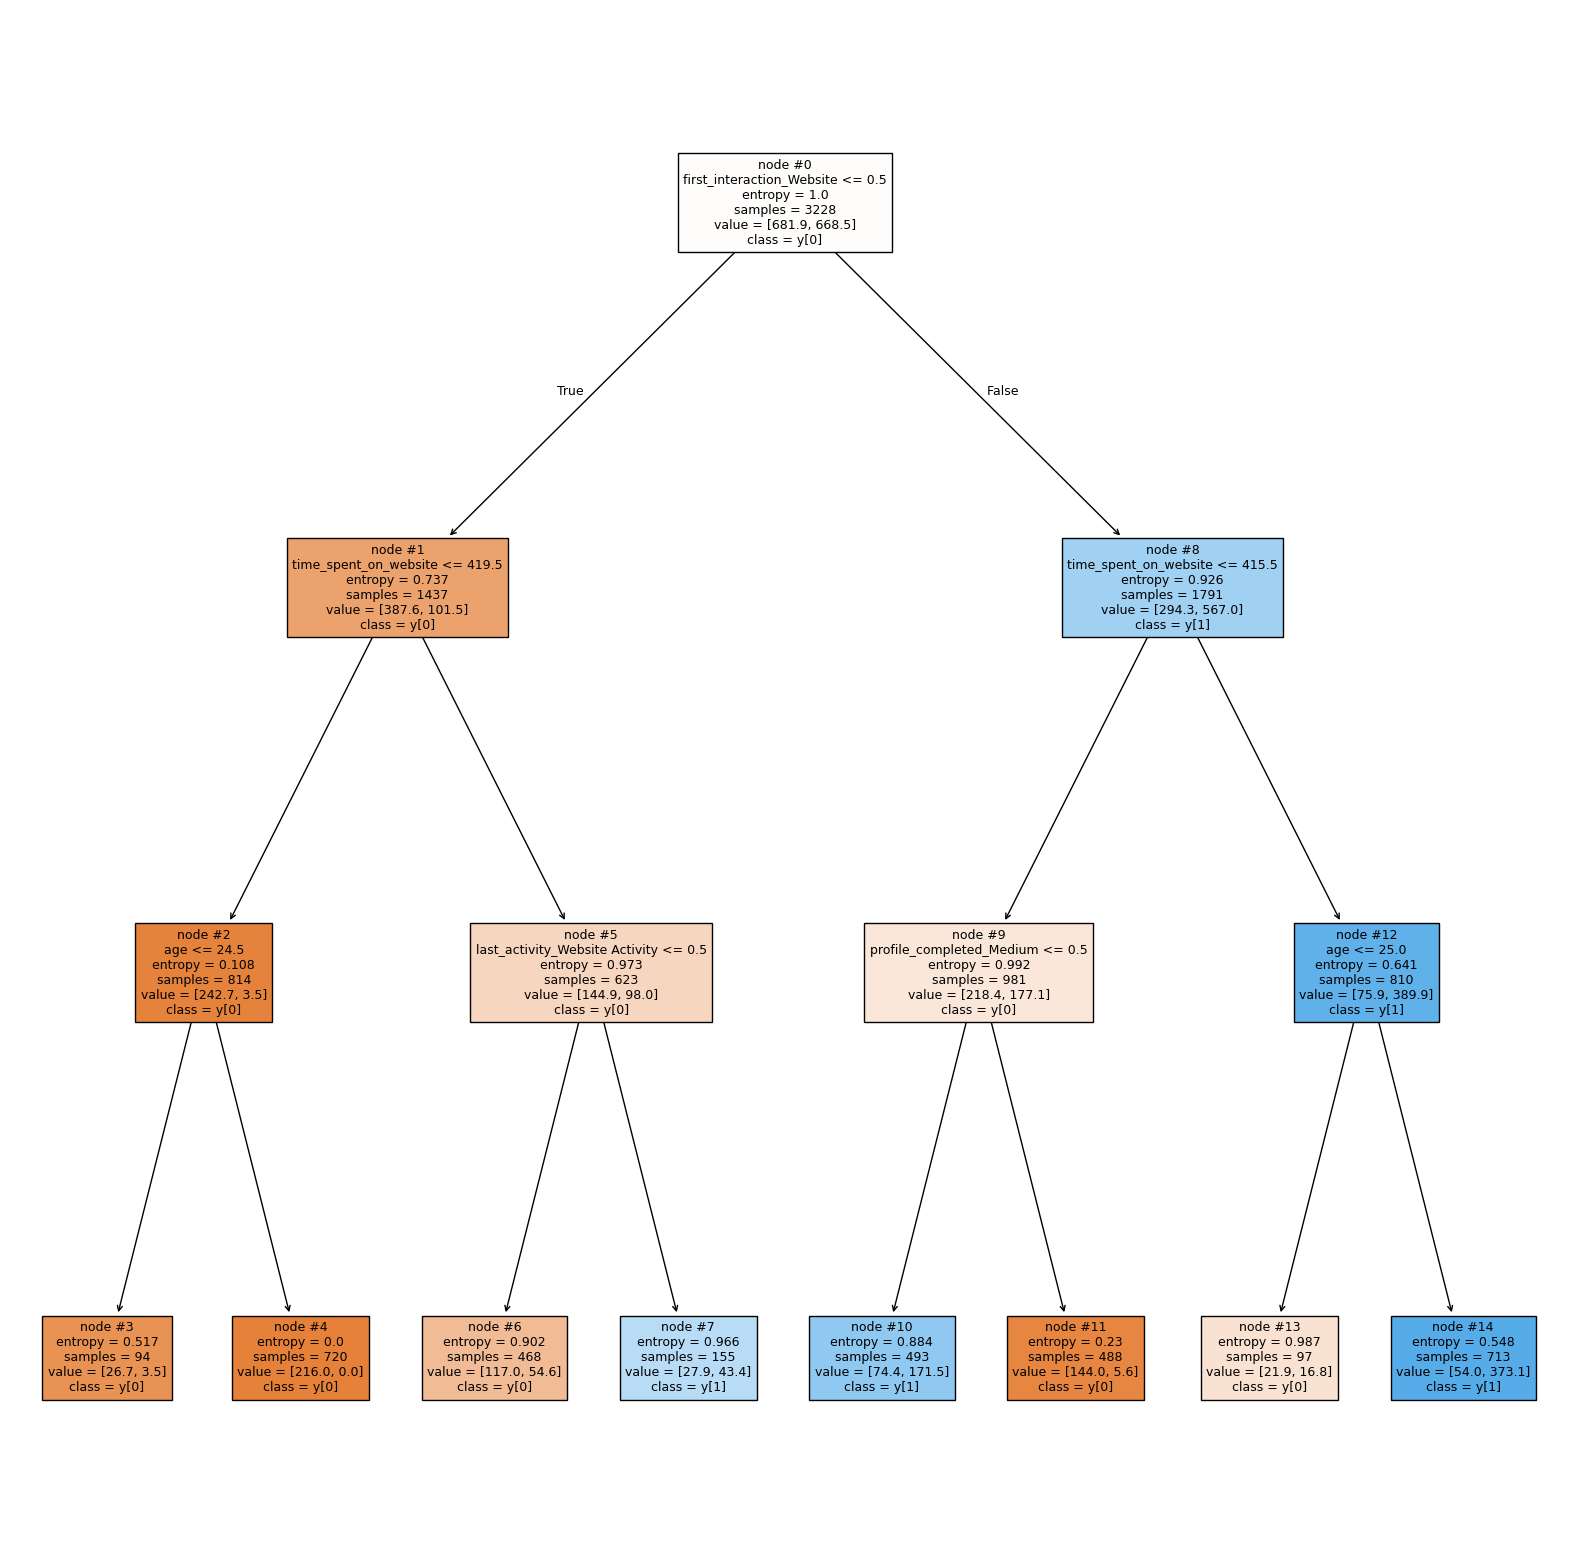

In [58]:
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

**Note:** Les feuilles bleues représentent les pistes converties, c'est-à-dire **y[1]**, tandis que les feuilles orange représentent les pistes non converties, c'est-à-dire **y[0]**. En outre, plus le nombre d'observations dans une feuille est élevé, plus sa couleur est foncée.

**Examinons l'importance des caractéristiques** du modèle d'arbre de décision accordé

In [59]:
# Importance des caractéristiques dans la construction de l'arbre

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
time_spent_on_website          0.34814
first_interaction_Website      0.32718
profile_completed_Medium       0.23927
age                            0.06389
last_activity_Website Activity 0.02151
current_occupation_Student     0.00000
page_views_per_visit           0.00000
website_visits                 0.00000
profile_completed_Low          0.00000
current_occupation_Unemployed  0.00000
last_activity_Phone Activity   0.00000
print_media_type1_Yes          0.00000
print_media_type2_Yes          0.00000
digital_media_Yes              0.00000
educational_channels_Yes       0.00000
referral_Yes                   0.00000


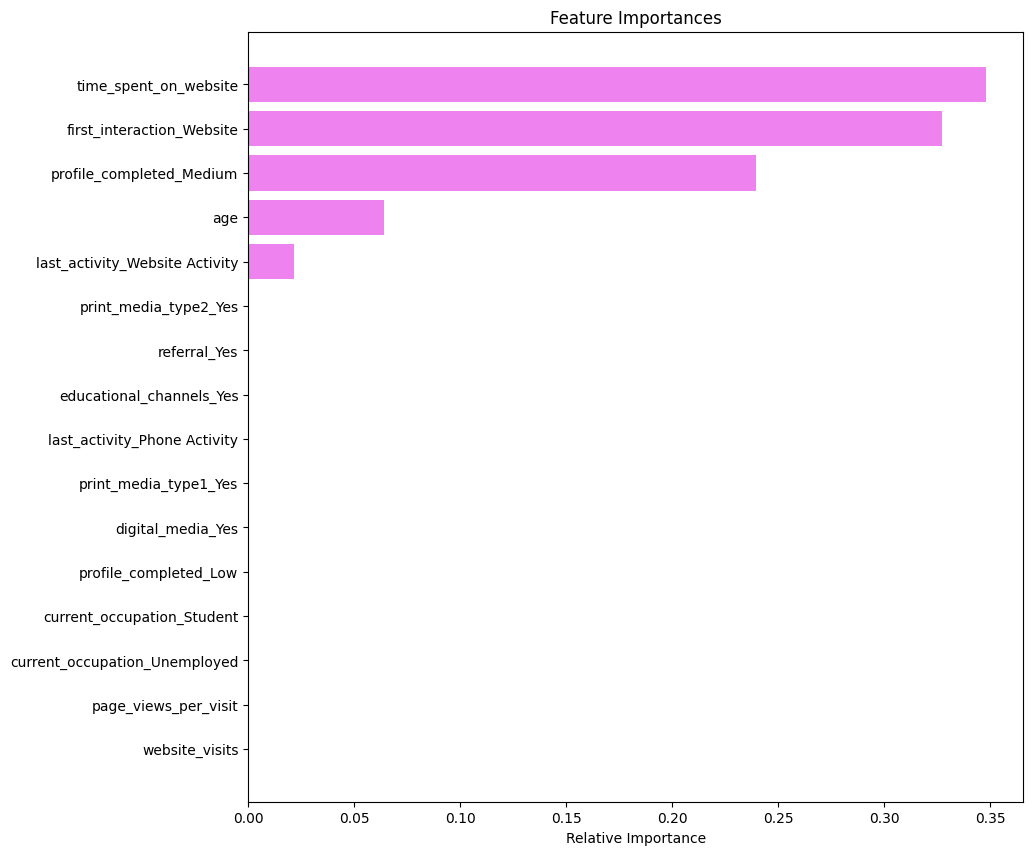

In [60]:
# Anqlyse de l'importance de la caractéristique
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Importance de colonnes')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**
- Le temps passé sur le site web et la première_interaction_sur le site web sont les caractéristiques les plus importantes** **suivies par le profil_complété, l'âge et la dernière_activité**.
- Les autres variables n'ont aucun impact dans ce modèle, lorsqu'il s'agit de décider si un prospect sera converti ou non**.

Construisons maintenant un autre modèle - **un classificateur de forêt aléatoire**.

### **Random Forest Classifier**

### Contruction du Modele Random Forest

In [61]:
rf_estimator = RandomForestClassifier(random_state = 1)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

**Vérifions les performances du modèle sur les données d'apprentissage.**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



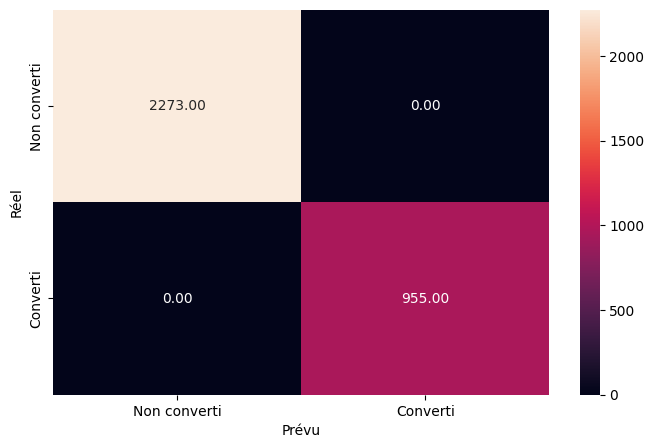

In [62]:
y_pred_train3 = rf_estimator.predict(X_train)
metrics_score(y_train, y_pred_train3)

**Vérifions les performances sur les données de test**

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       962
           1       0.78      0.68      0.73       422

    accuracy                           0.84      1384
   macro avg       0.82      0.80      0.81      1384
weighted avg       0.84      0.84      0.84      1384



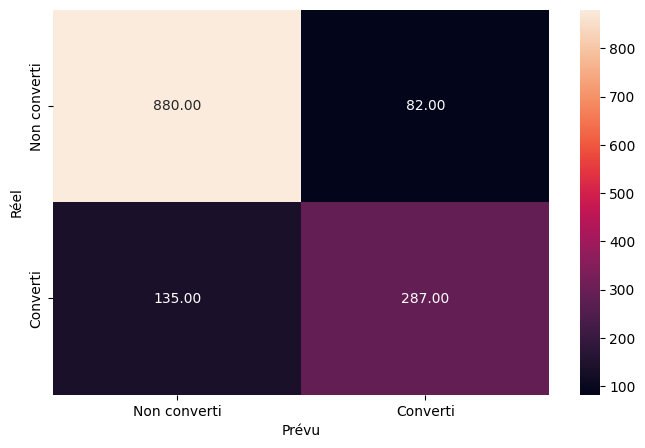

In [63]:
y_pred_test3 =  rf_estimator.predict(X_test)
metrics_score(y_test, y_pred_test3)

**Voyons si nous pouvons obtenir un meilleur modèle en ajustant le classificateur de la forêt aléatoire.**

### **Random Forest Classifier - Réglage des hyperparamètres**

Essayons **d'ajuster certains des hyperparamètres importants du classifieur Random Forest**. 

Nous n'allons **pas** ajuster l'hyperparamètre `criterion` car nous savons, grâce à l'ajustement de l'hyperparamètre pour les arbres de décision, que l'entropie est un meilleur critère de séparation pour ces données.

In [64]:
# Choix le type de classificateur
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
             }
scorer = metrics.make_scorer(recall_score, pos_label=1)

# Exécuter la recherche en grille sur les données d'entraînement en utilisant scorer=scorer et cv=5
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)

grid_obj = grid_obj.fit(X_train, y_train)

rf_estimator_tuned = grid_obj.best_estimator_

In [65]:
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=120, random_state=7)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2273
           1       0.68      0.87      0.76       955

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.84      3228



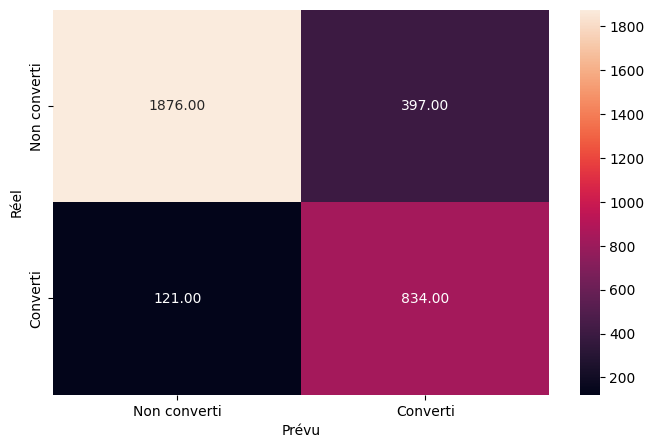

In [66]:
# Vérification des performances sur les données d'apprentissage
y_pred_train4 =rf_estimator_tuned.predict(X_train)
metrics_score(y_train, y_pred_train4)

**Vérifions la performance du modèle sur les données de test.**

              precision    recall  f1-score   support

           0       0.93      0.83      0.87       962
           1       0.68      0.85      0.76       422

    accuracy                           0.83      1384
   macro avg       0.81      0.84      0.82      1384
weighted avg       0.85      0.83      0.84      1384



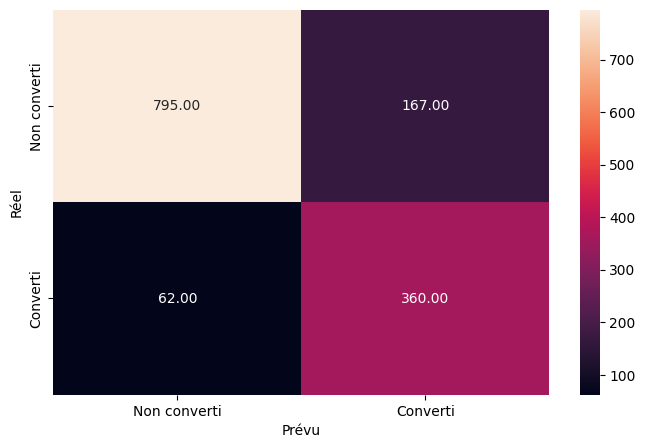

In [67]:
# Vérification des performances sur les données de test
y_pred_test4 = rf_estimator_tuned.predict(X_test)
metrics_score(y_test, y_pred_test4)

**L'un des inconvénients des modèles d'ensemble est que nous perdons la possibilité d'obtenir une interprétation du modèle. Nous ne pouvons pas observer les règles de décision pour les forêts aléatoires comme nous le faisions pour les arbres de décision. Nous nous contenterons donc de vérifier l'importance des caractéristiques du modèle.**

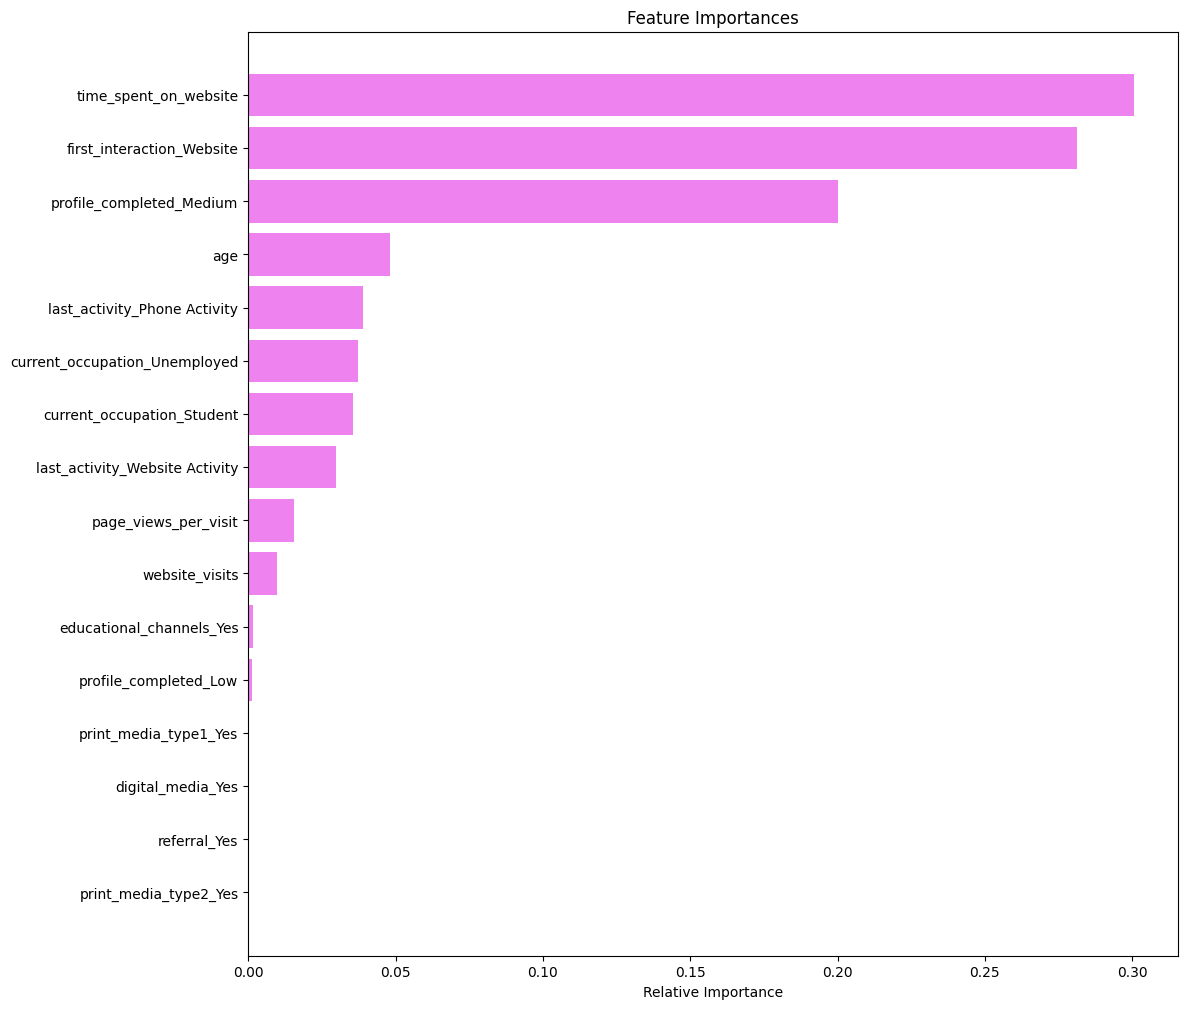

In [68]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**
- De manière similaire au modèle d’arbre de décision, le temps passé sur le site web, la première interaction avec le site, le profil complété et l’âge sont les quatre principales caractéristiques permettant de distinguer les prospects non convertis des prospects convertis.
- Contrairement à l’arbre de décision, la forêt aléatoire accorde également une certaine importance à d’autres variables, telles que la profession et le nombre de pages vues par visite. Cela implique que la forêt aléatoire prend en compte un plus grand nombre de facteurs par rapport à l’arbre de décision.

# VII. Construction de Reseau de Neuron

In [77]:
# Creation du modele de Reseau de Neuron
model_snn = Sequential()

In [78]:
from sklearn.preprocessing import StandardScaler

# 1. Normalisation des données (crucial pour la régression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
# 1. Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Architecture du modèle
model_snn = Sequential([
    Dense(32, activation='relu', input_shape=(16,)),
    Dense(1, activation='sigmoid')  # Classification binaire
])

# 3. Compilation avec paramètres optimisés
model_snn.compile(
    optimizer=Adam(learning_rate=0.001),  # LR réduit
    loss='binary_crossentropy',
    metrics=['accuracy']  # Utilisez accuracy pour la classification
)

# 4. Entraînement
history = model_snn.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test_scaled, y_test)
)
# 5. Évaluation (pour classification)
from sklearn.metrics import classification_report
y_pred = (model_snn.predict(X_test_scaled) > 0.5).astype(int)  # Seuil à 0.5
print(classification_report(y_test, y_pred))


Epoch 1/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7024 - loss: 0.6007 - val_accuracy: 0.7623 - val_loss: 0.5000
Epoch 2/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7931 - loss: 0.4652 - val_accuracy: 0.8042 - val_loss: 0.4386
Epoch 3/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8239 - loss: 0.4191 - val_accuracy: 0.8129 - val_loss: 0.4141
Epoch 4/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8398 - loss: 0.3886 - val_accuracy: 0.8172 - val_loss: 0.4043
Epoch 5/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8433 - loss: 0.3702 - val_accuracy: 0.8194 - val_loss: 0.3989
Epoch 6/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8538 - loss: 0.3572 - val_accuracy: 0.8230 - val_loss: 0.3956
Epoch 7/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8544 - loss: 0.3546 - val_accuracy: 0.8215 - val_loss: 0.3930
Epoch 8/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8559 - loss: 0.3398 - val_accu

In [80]:
# Affichage de l'entrainement
epoch_accuracy = history.history['accuracy']
epoch_loss = history.history['loss']

epoch_val_accuracy = history.history['val_accuracy']
epoch_val_loss = history.history['val_loss']

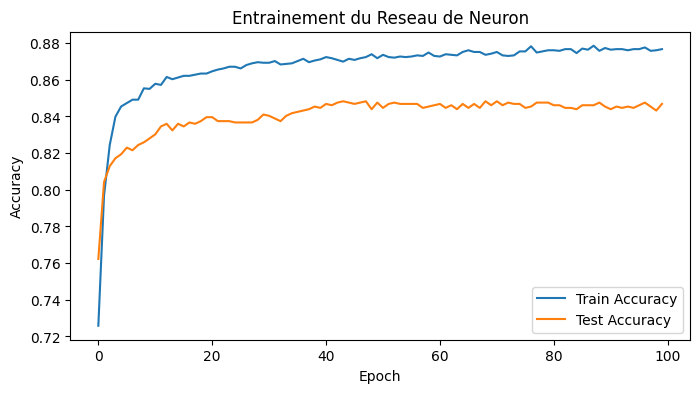

In [81]:
plt.figure(figsize=(8, 4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, label='Train Accuracy')
plt.plot(range(0, len(epoch_val_accuracy)), epoch_val_accuracy, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Entrainement du Reseau de Neuron')
plt.legend()
plt.show()

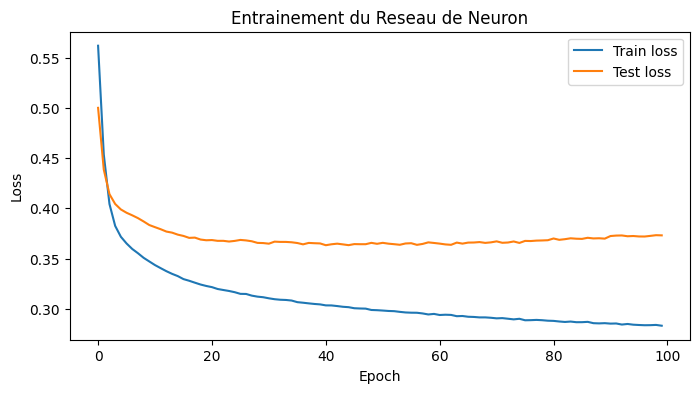

In [82]:
plt.figure(figsize=(8, 4))
plt.plot(range(0, len(epoch_loss)), epoch_loss, label='Train loss')
plt.plot(range(0, len(epoch_val_loss)), epoch_val_loss, label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Entrainement du Reseau de Neuron')
plt.legend()
plt.show()

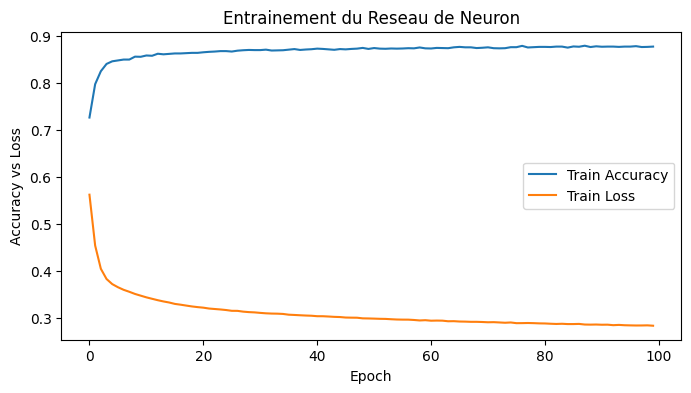

In [83]:
plt.figure(figsize=(8, 4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, label='Train Accuracy')
plt.plot(range(0, len(epoch_loss)), epoch_loss, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy vs Loss')
plt.title('Entrainement du Reseau de Neuron')
plt.legend()
plt.show()

## VIII. Conclusion

En comparant le meileur Modele de Machine Learning et Celui de deep Learning. Nous recommandons l'utilisation du Modele de Deep Learning **Snn dont l'accuracy est 0.85%** 